# 1.Importing libraries & dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv(r'C:\Users\vksk0\Downloads\train_wn75k28.csv')

# 2.Taking a Glimpse of Data

In [4]:
df.head(5)

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [5]:
df.tail(5)

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
39156,39157,2021-12-31,11,11,2.0,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,0
39157,39158,2021-12-31,3,9,3.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
39158,39159,2021-12-31,8,7,2.0,NaN,1,0,0,0,1,0,1,0,0,0,0,0,0
39159,39160,2021-12-31,7,12,2.0,NaN,0,0,0,0,0,1,0,0,0,0,1,0,0
39160,39161,2021-12-31,2,5,NaN,2019-08-11,1,0,0,0,0,0,1,0,0,0,0,0,0


In [6]:
df.shape

(39161, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [8]:
df.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [9]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    39161 non-null  int64         
 1   created_at            39161 non-null  datetime64[ns]
 2   campaign_var_1        39161 non-null  int64         
 3   campaign_var_2        39161 non-null  int64         
 4   products_purchased    18250 non-null  float64       
 5   signup_date           24048 non-null  datetime64[ns]
 6   user_activity_var_1   39161 non-null  int64         
 7   user_activity_var_2   39161 non-null  int64         
 8   user_activity_var_3   39161 non-null  int64         
 9   user_activity_var_4   39161 non-null  int64         
 10  user_activity_var_5   39161 non-null  int64         
 11  user_activity_var_6   39161 non-null  int64         
 12  user_activity_var_7   39161 non-null  int64         
 13  user_activity_va

In [11]:
df.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [12]:
#print the unique value
df.nunique()

id                      39161
created_at                365
campaign_var_1             16
campaign_var_2             15
products_purchased          4
signup_date              1800
user_activity_var_1         4
user_activity_var_2         2
user_activity_var_3         2
user_activity_var_4         2
user_activity_var_5         3
user_activity_var_6         4
user_activity_var_7         3
user_activity_var_8         3
user_activity_var_9         2
user_activity_var_10        2
user_activity_var_11        5
user_activity_var_12        2
buy                         2
dtype: int64

In [13]:
df.products_purchased.value_counts()

2.0    8867
3.0    5024
1.0    3643
4.0     716
Name: products_purchased, dtype: int64

In [14]:
df.signup_date.value_counts()

2021-07-18    45
2021-08-03    38
2021-01-28    38
2021-09-10    38
2021-09-20    38
              ..
2018-11-16     1
2018-05-20     1
2017-12-08     1
2017-10-12     1
2017-10-19     1
Name: signup_date, Length: 1800, dtype: int64

In [15]:
df[df.duplicated()].shape 

(0, 19)

In [16]:
df.fillna(0,inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    39161 non-null  int64         
 1   created_at            39161 non-null  datetime64[ns]
 2   campaign_var_1        39161 non-null  int64         
 3   campaign_var_2        39161 non-null  int64         
 4   products_purchased    39161 non-null  float64       
 5   signup_date           39161 non-null  object        
 6   user_activity_var_1   39161 non-null  int64         
 7   user_activity_var_2   39161 non-null  int64         
 8   user_activity_var_3   39161 non-null  int64         
 9   user_activity_var_4   39161 non-null  int64         
 10  user_activity_var_5   39161 non-null  int64         
 11  user_activity_var_6   39161 non-null  int64         
 12  user_activity_var_7   39161 non-null  int64         
 13  user_activity_va

<AxesSubplot:>

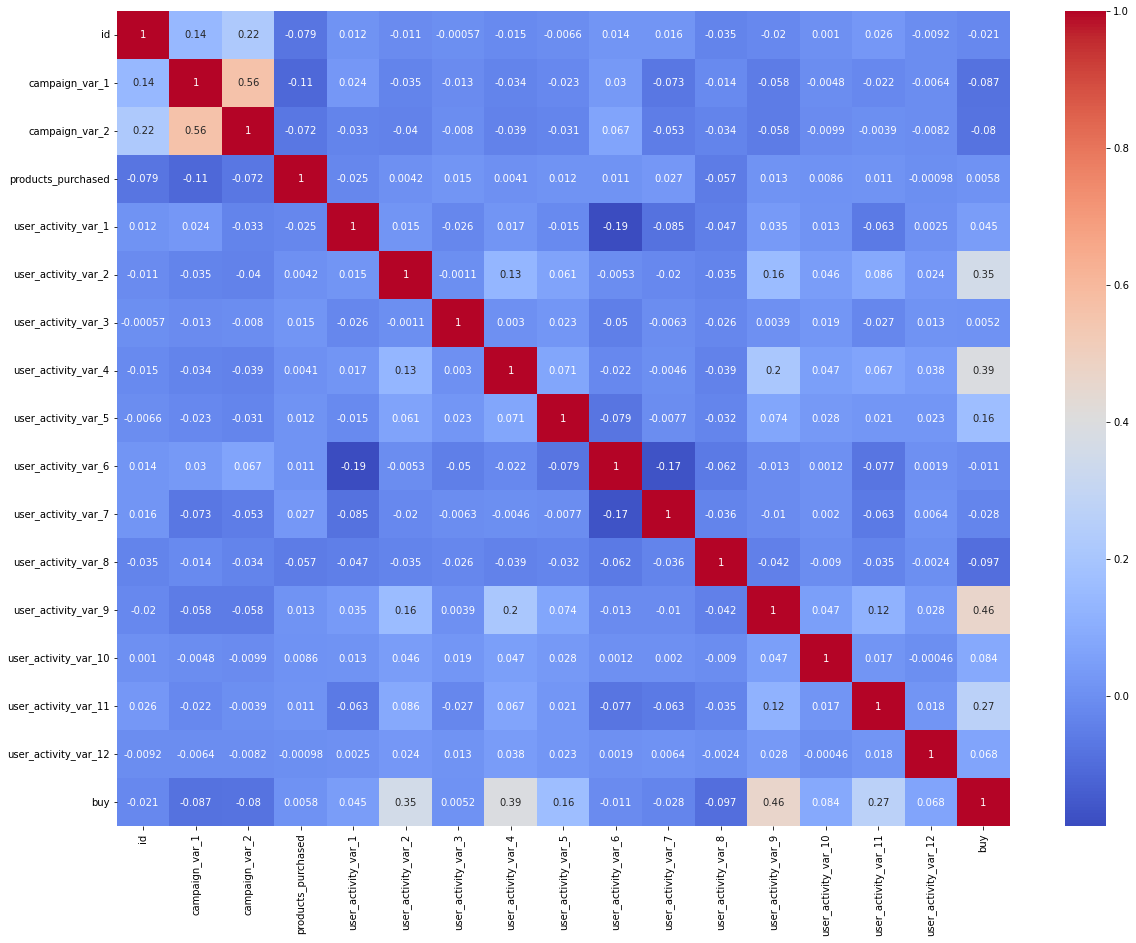

In [18]:
#plotting the heatmap 
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

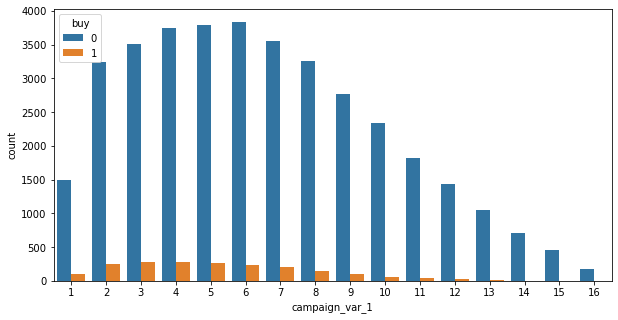

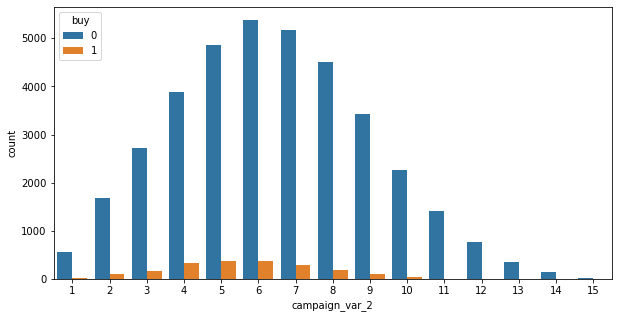

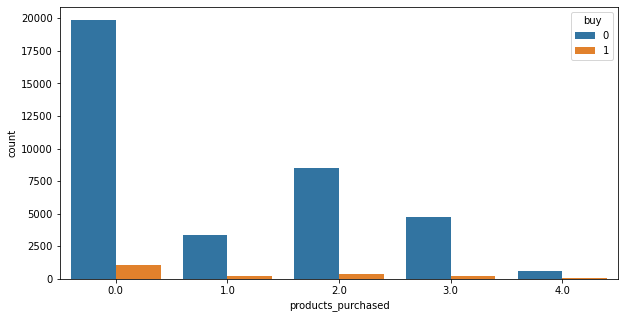

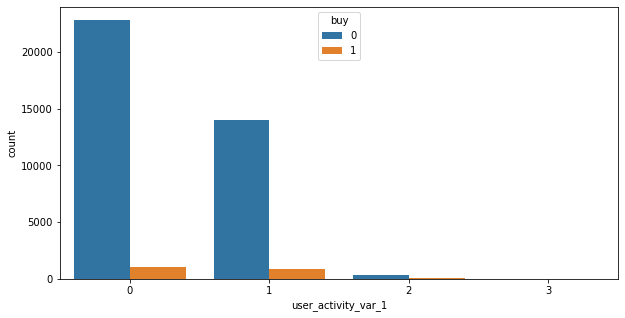

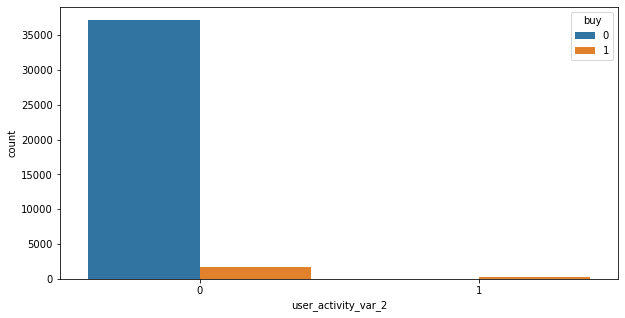

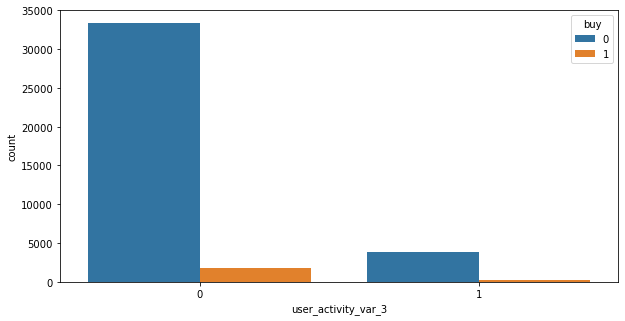

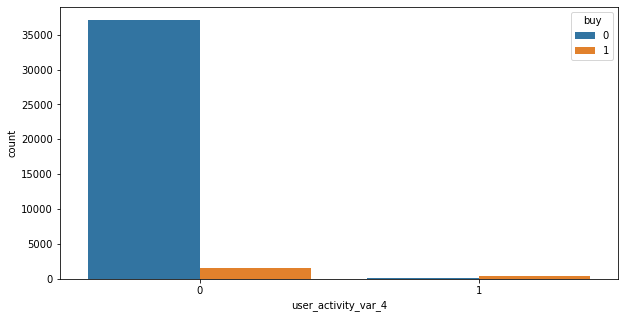

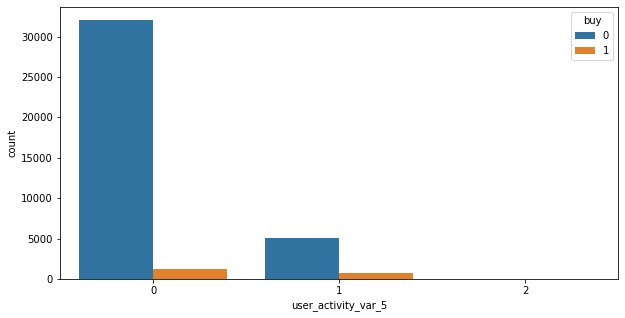

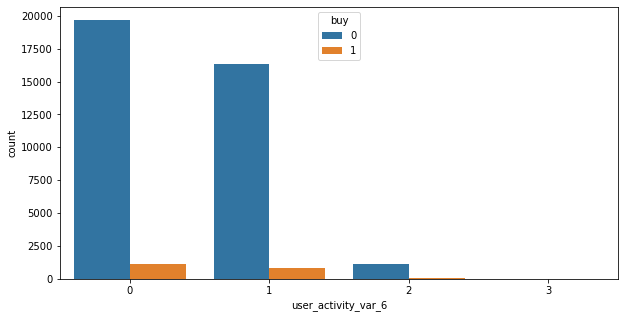

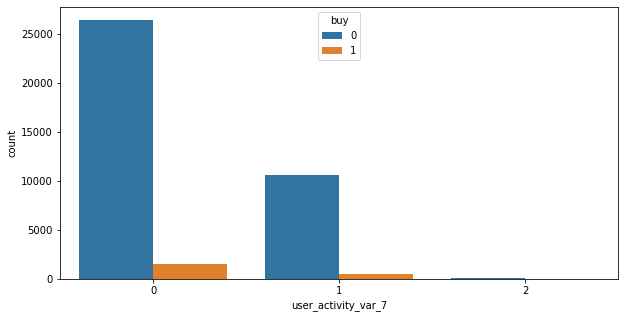

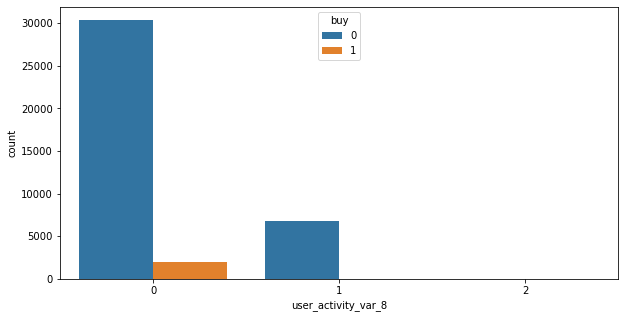

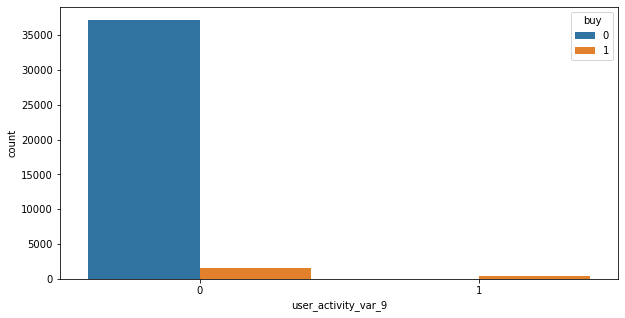

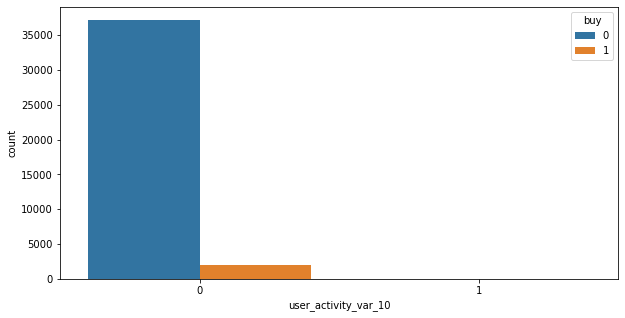

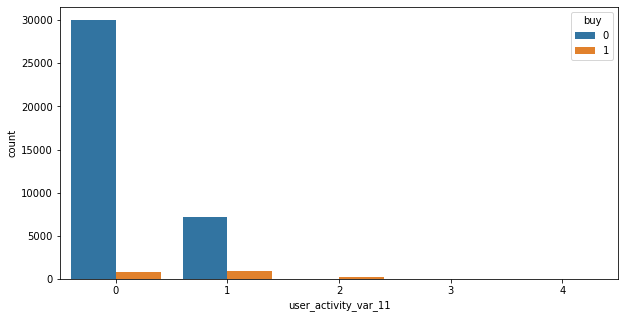

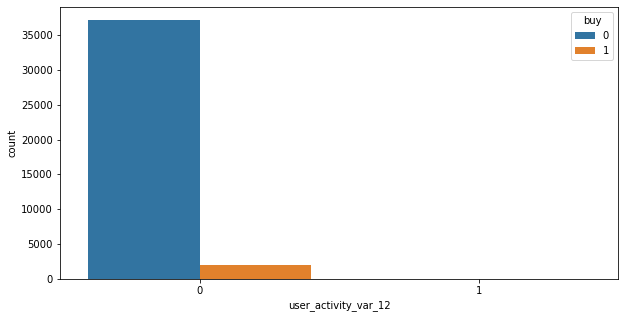

In [19]:
#plotting the count plot for Previous payment status
pre_payment = ['campaign_var_1','campaign_var_2','products_purchased','user_activity_var_1','user_activity_var_2','user_activity_var_3','user_activity_var_4','user_activity_var_5','user_activity_var_6','user_activity_var_7','user_activity_var_8',
              'user_activity_var_9','user_activity_var_10','user_activity_var_11','user_activity_var_12']
for col in pre_payment:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'buy', data = df)

In [20]:
df.buy.value_counts()

0    37163
1     1998
Name: buy, dtype: int64

In [21]:
df['buy'].value_counts(normalize=True)

0    0.94898
1    0.05102
Name: buy, dtype: float64

# SMOTE

In [199]:
from tensorflow_addons import losses

In [198]:
pip install tensorflow-addons

Note: you may need to restart the kernel to use updated packages.


In [207]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(15, input_dim=15, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [201]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [202]:
#define the X and y value
X = df.drop(['buy','id','created_at','signup_date'],axis=1)
y = df['buy']

In [203]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    37163
1    37163
Name: buy, dtype: int64

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [205]:
# Number of classes in training Data
y_train.value_counts()

1    29730
0    29730
Name: buy, dtype: int64

In [208]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
1859/1859 [==============================] - 8s 2ms/step - loss: 0.4923 - accuracy: 0.7573
Epoch 2/100
1859/1859 [==============================] - 4s 2ms/step - loss: 0.4218 - accuracy: 0.7857
Epoch 3/100
1859/1859 [==============================] - 3s 2ms/step - loss: 0.4163 - accuracy: 0.7883
Epoch 4/100
1859/1859 [==============================] - 4s 2ms/step - loss: 0.4142 - accuracy: 0.7911
Epoch 5/100
1859/1859 [==============================] - 3s 2ms/step - loss: 0.4115 - accuracy: 0.7918
Epoch 6/100
1859/1859 [==============================] - 3s 2ms/step - loss: 0.4094 - accuracy: 0.7926
Epoch 7/100
1859/1859 [==============================] - 3s 2ms/step - loss: 0.4084 - accuracy: 0.7946
Epoch 8/100
1859/1859 [==============================] - 3s 2ms/step - loss: 0.4064 - accuracy: 0.7942
Epoch 9/100
1859/1859 [==============================] - 3s 2ms/step - loss: 0.4046 - accuracy: 0.7964
Epoch 10/100
1859/1859 [==============================] - 3s 2ms/step - l

# Logistic Regression

In [22]:
#define the X and y value
X = df.drop(['buy','id','created_at','signup_date'],axis=1)
y = df['buy']

In [23]:
columns = X.columns

In [24]:
#standardise the x value by using satandardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [26]:
#set the parmeter
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [27]:
#fit the parameter 
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


F:\Vikas\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "F:\Vikas\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Vikas\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "F:\Vikas\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [28]:
optimized_clf = grid_lr_clf.best_estimator_

In [29]:
grid_lr_clf.best_params_

{'C': 10, 'penalty': 'l2'}

In [30]:
grid_lr_clf.best_score_

0.9737394351769009

In [31]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [32]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [33]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.9738156039181309
The accuracy on test data is  0.9736149798823893


In [34]:
#print the accuracy,precission,recall,f1,roc_score 
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.9736149798823893
The precision on test data is  0.5007587253414264
The recall on test data is  0.9649122807017544
The f1 on test data is  0.6593406593406593
The roc_score on test data is  0.9693819073195626


In [35]:
# Get the confusion matrix for both train and test
cm_lr = confusion_matrix(y_train, train_class_preds)
print(cm_lr)

[[24863    35]
 [  652   687]]


[Text(0, 0.5, 'Not buy'), Text(0, 1.5, 'buy')]

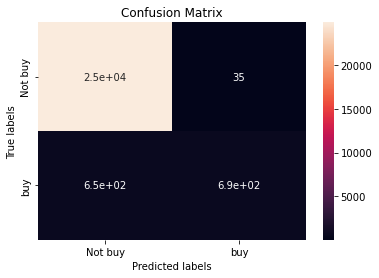

In [36]:
labels = ['Not buy', 'buy']
ax= plt.subplot()
sns.heatmap(cm_lr, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


In [37]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })

In [38]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

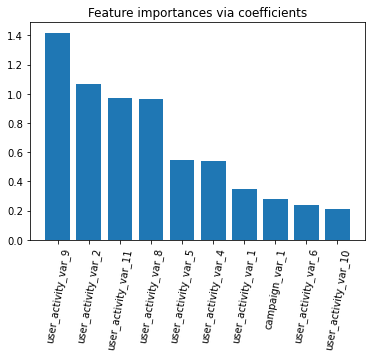

In [39]:
#plot the graph 
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [40]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

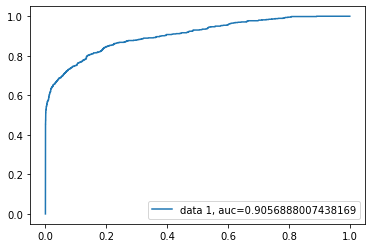

In [41]:
#plot the graph
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Random Forest

In [42]:
#import the packages
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [45]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9867744025612685
The accuracy on test data is  0.968895078922934


In [46]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.968895078922934
The precision on test data is  0.5235204855842185
The recall on test data is  0.7967667436489607
The f1 on test data is  0.6318681318681318
The roc_score on test data is  0.8858143221086849


In [47]:
#set the parmeter
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [48]:
#fit the parameter
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [49]:
grid_rf_clf.best_score_

0.974882871664581

In [50]:
grid_rf_clf.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [51]:
optimal_rf_clf = grid_rf_clf.best_estimator_

In [52]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [53]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9761405648511644
The accuracy on test data is  0.9738471061590839


In [54]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.9738471061590839
The precision on test data is  0.503793626707132
The recall on test data is  0.967930029154519
The f1 on test data is  0.6626746506986028
The roc_score on test data is  0.9709692272789525


In [55]:
# Get the confusion matrix for both train and test
cm_rf = confusion_matrix(y_train, train_class_preds)
print(cm_rf)

[[24887    11]
 [  615   724]]


[Text(0, 0.5, 'Not buy'), Text(0, 1.5, 'buy')]

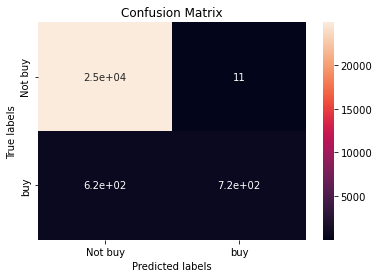

In [56]:
labels = ['Not buy', 'buy']
ax= plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [57]:
len(optimal_rf_clf.feature_importances_)

15

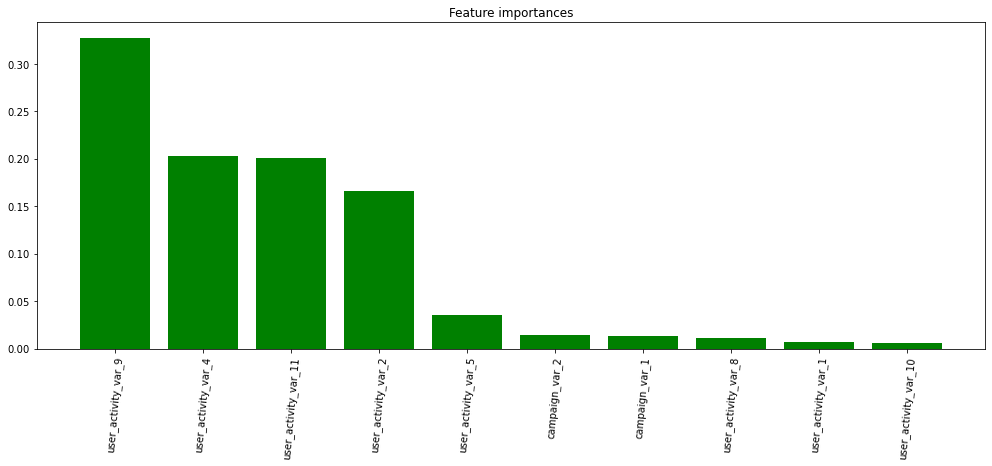

In [58]:
# Feature Importance
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="g",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [59]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [60]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]

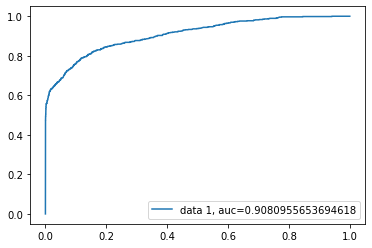

In [61]:
import sklearn.metrics as metrics
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Implementing SVC

In [62]:
from sklearn.svm import SVC

In [63]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],   
              'kernel': ['rbf']} 

In [64]:
#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [65]:
#set the parmeter
#fit the parameter
grid_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [66]:
optimal_SVC_clf = grid_clf.best_estimator_

In [67]:
grid_clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [68]:
grid_clf.best_score_

0.974920979967384

In [69]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [70]:
# Get the accuracy scores
train_accuracy_SVC = accuracy_score(train_class_preds,y_train)
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.9738156039181309
The accuracy on test data is  0.9736149798823893


In [71]:
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)
test_precision_score_SVC = precision_score(test_class_preds,y_test)
test_recall_score_SVC = recall_score(test_class_preds,y_test)
test_f1_score_SVC = f1_score(test_class_preds,y_test)
test_roc_score_SVC = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_SVC)
print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)
print("The roc_score on test data is ", test_roc_score_SVC)

The accuracy on test data is  0.974233983286908
The precision on test data is  0.5144157814871017
The recall on test data is  0.9630681818181818
The f1 on test data is  0.6706231454005934
The roc_score on test data is  0.96880739666792


[[24884    14]
 [  603   736]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

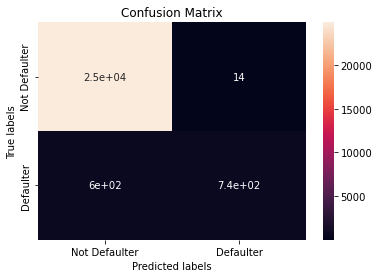

In [72]:
  # Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [73]:
optimal_SVC_clf

SVC(C=10, probability=True)

In [74]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [75]:
y_pred_proba_SVC = optimal_SVC_clf.predict_proba(X_test)[::,1]

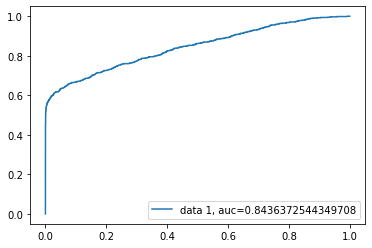

In [76]:
# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_SVC)
auc = roc_auc_score(y_test, y_pred_proba_SVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# XGBoost

In [77]:
#import lightgbm and xgboost 
import xgboost as xgb

In [78]:
#The data is stored in a DMatrix object 
#label is used to define our outcome variable
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [79]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [80]:
#training our model 
num_round=50
from datetime import datetime 
start = datetime.now() 
xg=xgb.train(parameters,dtrain,num_round) 
stop = datetime.now()

[12:06:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [81]:
#Execution time of the model 
execution_time_xgb = stop-start 
execution_time_xgb

datetime.timedelta(seconds=1, microseconds=4388)

In [82]:
#now predicting our model on train set 
train_class_preds_probs=xg.predict(dtrain) 
#now predicting our model on test set 
test_class_preds_probs =xg.predict(dtest) 

In [83]:
len(train_class_preds_probs)

26237

In [84]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [85]:
test_class_preds_probs[:20]

array([0.05144623, 0.04170215, 0.09984364, 0.28219727, 0.05261455,
       0.07993133, 0.05261455, 0.05223127, 0.06183724, 0.05261455,
       0.04170215, 0.05261455, 0.06183724, 0.05261455, 0.04876259,
       0.07916498, 0.10268182, 0.28261018, 0.04547094, 0.05261455],
      dtype=float32)

In [86]:
test_class_preds[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [87]:
len(y_train)

26237

In [88]:
len(train_class_preds)

26237

In [89]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.9753782825780386
The accuracy on test data is  0.9733828536056949


In [90]:
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on test data is  0.9733828536056949
The precision on test data is  0.4977238239757208
The recall on test data is  0.9618768328445748
The f1 on test data is  0.656
The roc_score on train data is  0.9677857501264915


In [91]:
# Get the confusion matrix for both train and test
cm_xg = confusion_matrix(y_train, train_class_preds)
print(cm_xg)

[[24880    18]
 [  628   711]]


[Text(0, 0.5, 'Not buy'), Text(0, 1.5, 'buy')]

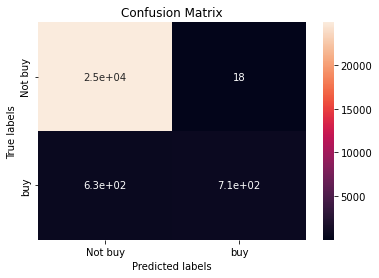

In [92]:
labels = ['Not buy', 'buy']
ax= plt.subplot()
sns.heatmap(cm_xg, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [93]:
#import the packages
from xgboost import  XGBClassifier

In [94]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1,cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [95]:
 gsearch1.best_score_

0.9749591057030793

In [96]:
optimal_xgb = gsearch1.best_estimator_

In [97]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [98]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.9755307390326637
The accuracy on test data is  0.9740018570102136


In [99]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  0.9740018570102136
The precision on test data is  0.5098634294385432
The recall on test data is  0.9627507163323782
The f1 on test data is  0.6666666666666666
The roc_score on train data is  0.9685324158202645


In [100]:
pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

,importance_xgb
user_activity_var_9,0.334251
user_activity_var_4,0.184085
user_activity_var_2,0.155495
user_activity_var_11,0.114602
user_activity_var_5,0.059319
user_activity_var_8,0.056372
user_activity_var_1,0.022871
campaign_var_2,0.019180
campaign_var_1,0.016796
user_activity_var_6,0.013824


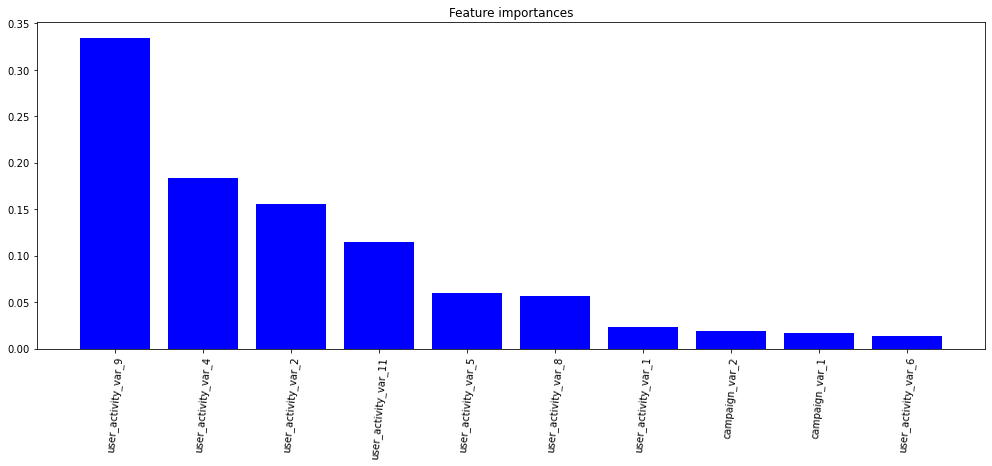

In [101]:
# Feature Importance
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="b",  align="center")
plt.xticks(feature_importances_xgb.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [102]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

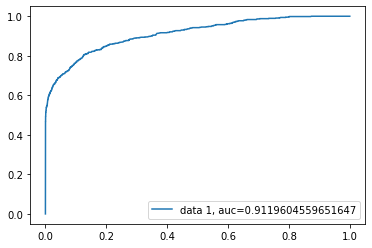

In [103]:
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [104]:
recall_score

<function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [105]:
#create a table of all models all score for comparison 
classifiers = ['Logistic Regression', 'SVC', 'Random Forest CLf', 'Xgboost Clf']
train_accuracy = [train_accuracy_lr, train_accuracy_SVC, train_accuracy_rf, train_accuracy_xgb_tuned]
test_accuracy = [test_accuracy_lr, test_accuracy_SVC, test_accuracy_rf, test_accuracy_xgb_tuned]
precision_score = [test_precision_score_lr, test_precision_score_SVC, test_precision_score_rf, test_precision_xgb_tuned]
recall_score = [test_recall_score_lr, test_recall_score_SVC, test_recall_score_rf, test_recall_score_xgb_tuned]
f1_score = [test_f1_score_lr, test_f1_score_SVC, test_f1_score_rf, test_f1_score_xgb_tuned]

In [106]:
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score })


,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.973816,0.973615,0.500759,0.964912,0.659341
1,SVC,0.976484,0.974234,0.514416,0.963068,0.670623
2,Random Forest CLf,0.976141,0.973847,0.503794,0.967930,0.662675
3,Xgboost Clf,0.975531,0.974002,0.509863,0.962751,0.666667


In [107]:
classifiers_proba = [(optimized_clf, y_preds_proba_lr), 
               (optimal_rf_clf, y_preds_proba_rf), 
               (optimal_xgb, y_preds_proba_xgb),
               (optimal_SVC_clf,y_pred_proba_SVC)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [108]:
result_table

,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.0, 0.0, 8.153281695882592e-0...","[0.0, 0.0015174506828528073, 0.242792109256449...",0.905689
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0015174506828528073, 0.006069802731411...",0.908096
XGBClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0015174506828528073, 0.089529590288315...",0.911960
SVC,"[0.0, 0.0, 0.0, 0.00016306563391765185, 0.0001...","[0.0, 0.0015174506828528073, 0.021244309559939...",0.843637


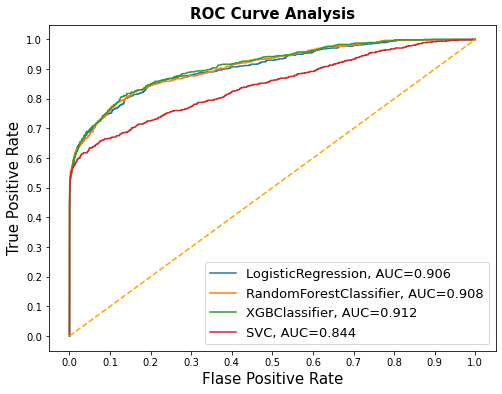

In [109]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()